# Customer analysis

We have a list of customers with their personal information and their behaviour.

We want to launch a new luxury and expensive product. 

Which customers should we target with personalized marketing?

# Task
- Perform basic data analysis and visualization
- Perform data editing (encoding)
- Select appropriate variables by which to segment customers
- Create a k-means model with an appropriate number of segments
- Visualize the model
- Which segment is the target segment?

# Data loading

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [34]:
data = pd.read_csv("../dataset/Mall_Customers.csv")


# Data description
- Information about the data
- Data preview
- Basic statistics
- View data distribution

In [35]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


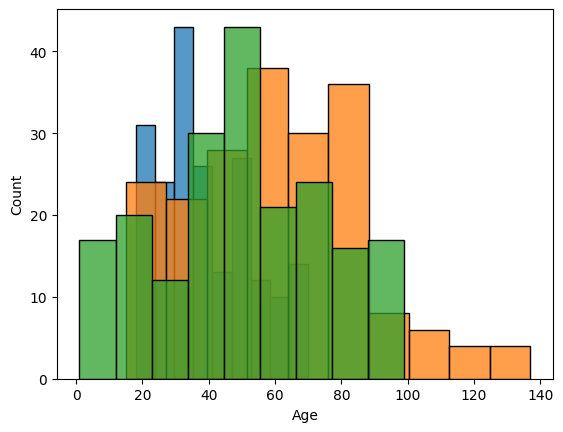

In [38]:
sns.histplot(data['Age'])
sns.histplot(data['Annual Income (k$)'])
sns.histplot(data['Spending Score (1-100)'])
plt.show()


# Data preparation
- Treatment of NaN values
- Encoding text columns

In [39]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


# Variable selection
- Displaying relationships between variables (pairplot)
- We are looking for a combination of variables that can be visually divided into groups
- Creating an X with only these columns

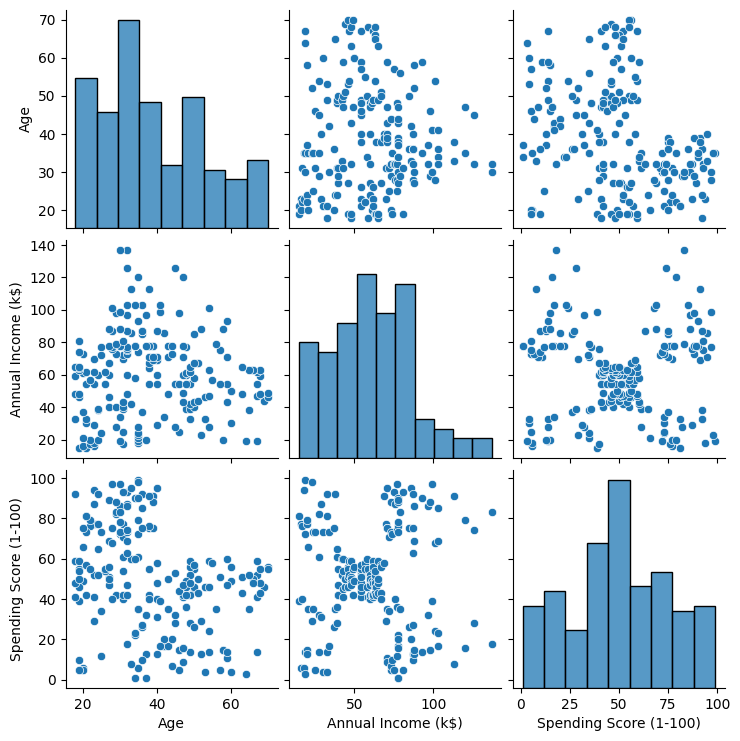

In [41]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [42]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


# Finding the k-mean model parameter
- Plotting elbow graph
- Finding the ideal number of clusters

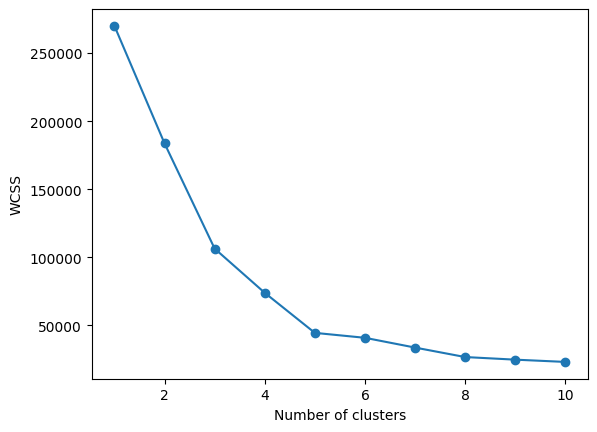

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Elbow point at k = 5

5 clusters provide optimal balance between variance and simplicity.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


# k-mean model for the observed number of clusters
- Training the model
- Data prediction

In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

In [46]:
data['Cluster'] = kmeans.predict(X)


# Visualization of the model
- Rendering of coloured groups of graphs

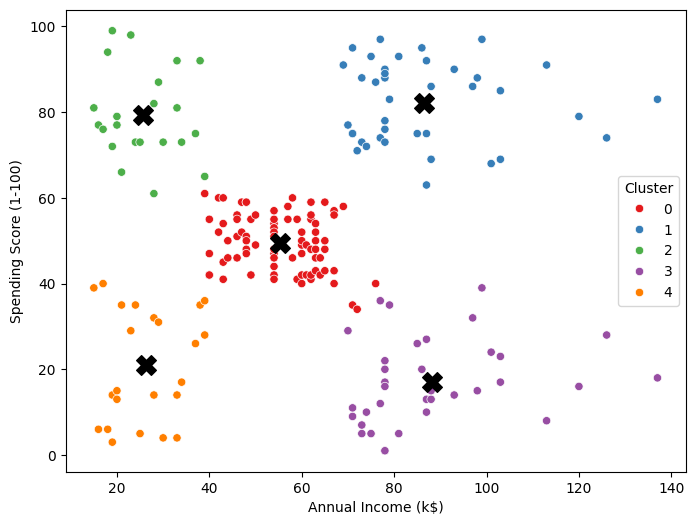

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=data
)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200,
    c='black',
    marker='X'
)
plt.show()


## Interpretation of the model
- Describe each group
- Which customers to target?

1.
cluster 0 : income-low , spending-low , low value customer
cluster 1 : income-low , spending-high , limited budget
cluster 2 : income-medium , spending-medium , Average customers
cluster 3 : income-high , spending-low , Wealthy 
cluster 4 : income-high , spending-high , Premium customers 


2.
High income and high spending customers (Cluster 4)

They have both:- Strong purchasing power,Proven willingness to spend